In [1]:
import csv
from datetime import date
import pickle
import calendar
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_data_from_csv(csv_name):
    payment_list_header = []
    with open(f'{csv_name}.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            payment_list_header.append(row)
    return payment_list_header[1:]

In [3]:
payment_list= extract_data_from_csv("Chase1131_Activity20220909_20221008_20240417")

In [4]:
payment_list

[['10/06/2022',
  '10/07/2022',
  'RACEWIRE.COM',
  'Gifts & Donations',
  'Sale',
  '-28.45',
  ''],
 ['10/02/2022',
  '10/02/2022',
  'Payment Thank You-Mobile',
  '',
  'Payment',
  '525.69',
  ''],
 ['09/30/2022',
  '10/02/2022',
  'TAYLOR RENTAL WELL SVSTR',
  'Home',
  'Sale',
  '-49.00',
  ''],
 ['09/22/2022',
  '09/25/2022',
  'RED SOX TICKETS',
  'Entertainment',
  'Sale',
  '-48.50',
  ''],
 ['09/23/2022',
  '09/25/2022',
  'AMK MUSIC HALL CONCESSION',
  'Food & Drink',
  'Sale',
  '-29.28',
  ''],
 ['09/23/2022',
  '09/25/2022',
  'CRAZY DOUGHS PIZZA',
  'Food & Drink',
  'Sale',
  '-12.04',
  ''],
 ['09/23/2022',
  '09/25/2022',
  'AMK MUSIC HALL CONCESSION',
  'Food & Drink',
  'Sale',
  '-31.72',
  ''],
 ['09/23/2022', '09/25/2022', 'MBTA KENMORE', 'Travel', 'Sale', '-4.80', ''],
 ['09/20/2022',
  '09/20/2022',
  'Spotify USA',
  'Bills & Utilities',
  'Sale',
  '-4.99',
  ''],
 ['09/15/2022',
  '09/18/2022',
  'SHELL OIL 57542442009',
  'Gas',
  'Sale',
  '-27.67',
  '']

In [5]:
def extract_day_of_week(my_date):
    split_date = my_date.split("/")
    year = int(split_date[2])
    month = int(split_date[0])
    day = int(split_date[1])
    return calendar.day_name[date(year, month, day).weekday()]

In [6]:
def spending_by_day_full_info(payment_list):
    day_spend_dict = {}
    for payment in payment_list:
        day_of_week = extract_day_of_week(payment[0])
        #print(day_of_week)
        if day_of_week in day_spend_dict:
            day_spend_dict[day_of_week].append([payment[0],payment[2],payment[3],payment[5]])
        else:
            day_spend_dict[day_of_week] = [payment[0],payment[2],payment[3],payment[5]]
    return day_spend_dict

In [7]:
def spending_by_day(payment_list):
    day_spend_dict = {}
    for payment in payment_list:
        if payment[4] == "Payment":
                continue
        day_of_week = extract_day_of_week(payment[0])
        if day_of_week in day_spend_dict:
                day_spend_dict[day_of_week]+=abs(float(payment[5]))
        else:
            day_spend_dict[day_of_week] = abs(float(payment[5]))
    return day_spend_dict

In [41]:
spending_by_day_full_info(payment_list)

{'Friday': ['04/07/2023',
  'CASH ADVANCE INTEREST CHA',
  'Fees & Adjustments',
  '-1.30',
  ['03/31/2023', 'LANSDOWNE PUB', 'Food & Drink', '-17.00'],
  ['03/17/2023', 'DROPKICK MURPHYS', 'Shopping', '-35.00'],
  ['03/10/2023', 'COMCAST CABLE COMM', 'Bills & Utilities', '-54.99']],
 'Tuesday': ['04/04/2023',
  'INSOMNIA COOKIES-STORR',
  'Food & Drink',
  '-9.12',
  ['03/14/2023', 'TM *DROPKICK MURPHYS', 'Entertainment', '-125.45'],
  ['03/14/2023', 'SP 47', 'Shopping', '-46.00']],
 'Wednesday': ['04/05/2023', 'LAZ PARKING 040235', 'Travel', '-14.00'],
 'Monday': ['04/03/2023',
  'AM CANCER SOC CV',
  'Gifts & Donations',
  '-26.38',
  ['03/20/2023', 'Spotify USA', 'Bills & Utilities', '-4.99']],
 'Saturday': ['04/01/2023',
  'LANSDOWNE PUB',
  'Food & Drink',
  '-6.00',
  ['04/01/2023', 'Payment Thank You-Mobile', '', '565.48'],
  ['03/25/2023', 'LANSDOWNE PUB', 'Food & Drink', '-23.00'],
  ['03/18/2023', 'NIKE INC', 'Shopping', '-35.00'],
  ['03/11/2023', 'CAICALI 2', 'Food & Drink

In [9]:
def spending_by_category_full_info(payment_list):
    category_spend_dict = {}
    for payment in payment_list:
        category = payment[3]
        if category in category_spend_dict:
            category_spend_dict[category].append([payment[0],payment[2],payment[5]])
        else:
            category_spend_dict[category] = [payment[0],payment[2],payment[5]]
    return day_spend_dict

In [10]:
def spending_by_category(payment_list):
    category_spend_dict = {}
    for payment in payment_list:
        category = payment[3]
        if category == '':
            category = "Payment"
        if category in category_spend_dict:
            category_spend_dict[category]+= abs(float(payment[5]))
        else:
            category_spend_dict[category] = abs(float(payment[5]))
    return category_spend_dict

In [11]:
spending_by_category(payment_list)

{'Gifts & Donations': 28.45,
 'Payment': 525.69,
 'Home': 49.0,
 'Entertainment': 48.5,
 'Food & Drink': 134.7,
 'Travel': 4.8,
 'Bills & Utilities': 49.86,
 'Gas': 27.67,
 'Health & Wellness': 10.41}

In [12]:
def spending_by_location_full_info(payment_list):
    location_spend_dict = {}
    for payment in payment_list:
        location = payment[2]
        if location in location_spend_dict:
            location_spend_dict[location].append([payment[0],payment[5]])
        else:
            location_spend_dict[location] = [payment[0],payment[5]]
    return location_spend_dict

In [120]:
def spending_by_location(payment_list):
    location_spend_dict = {}
    for payment in payment_list:
        location = payment[2]
        if payment[4] == "Payment":
                continue
        if location in location_spend_dict:
            location_spend_dict[location]+= abs(float(payment[5]))
        else:
            location_spend_dict[location] = abs(float(payment[5]))
    return location_spend_dict

In [121]:
spending_by_location(payment_list)

{'CASH ADVANCE INTEREST CHA': 1.3,
 'INSOMNIA COOKIES-STORR': 9.12,
 'LAZ PARKING 040235': 14.0,
 'AM CANCER SOC CV': 26.38,
 'LANSDOWNE PUB': 46.0,
 'Spotify USA': 4.99,
 'NIKE INC': 35.0,
 'BOSTON COLLEGE PARKING': 18.0,
 'AMK MUSIC HALL CONCESSION': 72.95,
 'DROPKICK MURPHYS': 35.0,
 'TM *DROPKICK MURPHYS': 125.45,
 'SP 47': 46.0,
 'NYACK HOT BAGELS': 15.72,
 'CAICALI 2': 21.0,
 'TRANSACTION FEE': 10.0,
 'FOREIGN TRANSACTION FEE': 1.3,
 'MB MORALES ROYALTON BAVAR': 43.35,
 'ROYALTON TIENDA PLAYA': 39.0,
 'COMCAST CABLE COMM': 54.99}

In [15]:
#Creating Storage File

def create_new_long_term_file(payment_list):
    storage_file = [payment_list]
    with open('credit_payment_history.pkl','wb') as f:
        pickle.dump(storage_file, f)
    f.close()

In [16]:
def open_long_term_file():
    with open('credit_payment_history.pkl', 'rb') as f:
        long_term_payment = pickle.load(f)
    f.close()
    return long_term_payment

In [17]:
def update_long_term_file(long_term_payment):
    with open('credit_payment_history.pkl','wb') as f:
        pickle.dump(long_term_payment, f)
    f.close()

In [18]:
def append_to_long_term_list(payment_list,long_term_payment):
    long_term_payment.append(payment_list)

In [19]:
payment_list= extract_data_from_csv("Chase1131_Activity20220909_20221008_20240417")
create_new_long_term_file(payment_list)

In [20]:
long_term_payment = open_long_term_file()

In [21]:
payment_list= extract_data_from_csv("Chase1131_Activity20221009_20221108_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20221109_20221208_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20221209_20230108_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20230109_20230208_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20230209_20230308_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20230309_20230408_20240418")
append_to_long_term_list(payment_list,long_term_payment)

In [22]:
open_long_term_file()

[[['10/06/2022',
   '10/07/2022',
   'RACEWIRE.COM',
   'Gifts & Donations',
   'Sale',
   '-28.45',
   ''],
  ['10/02/2022',
   '10/02/2022',
   'Payment Thank You-Mobile',
   '',
   'Payment',
   '525.69',
   ''],
  ['09/30/2022',
   '10/02/2022',
   'TAYLOR RENTAL WELL SVSTR',
   'Home',
   'Sale',
   '-49.00',
   ''],
  ['09/22/2022',
   '09/25/2022',
   'RED SOX TICKETS',
   'Entertainment',
   'Sale',
   '-48.50',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-29.28',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'CRAZY DOUGHS PIZZA',
   'Food & Drink',
   'Sale',
   '-12.04',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-31.72',
   ''],
  ['09/23/2022', '09/25/2022', 'MBTA KENMORE', 'Travel', 'Sale', '-4.80', ''],
  ['09/20/2022',
   '09/20/2022',
   'Spotify USA',
   'Bills & Utilities',
   'Sale',
   '-4.99',
   ''],
  ['09/15/2022',
   '09/18/2022',
   '

In [23]:
update_long_term_file(long_term_payment)

In [24]:
long_term_payment = open_long_term_file()
long_term_payment

[[['10/06/2022',
   '10/07/2022',
   'RACEWIRE.COM',
   'Gifts & Donations',
   'Sale',
   '-28.45',
   ''],
  ['10/02/2022',
   '10/02/2022',
   'Payment Thank You-Mobile',
   '',
   'Payment',
   '525.69',
   ''],
  ['09/30/2022',
   '10/02/2022',
   'TAYLOR RENTAL WELL SVSTR',
   'Home',
   'Sale',
   '-49.00',
   ''],
  ['09/22/2022',
   '09/25/2022',
   'RED SOX TICKETS',
   'Entertainment',
   'Sale',
   '-48.50',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-29.28',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'CRAZY DOUGHS PIZZA',
   'Food & Drink',
   'Sale',
   '-12.04',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-31.72',
   ''],
  ['09/23/2022', '09/25/2022', 'MBTA KENMORE', 'Travel', 'Sale', '-4.80', ''],
  ['09/20/2022',
   '09/20/2022',
   'Spotify USA',
   'Bills & Utilities',
   'Sale',
   '-4.99',
   ''],
  ['09/15/2022',
   '09/18/2022',
   '

In [25]:
def avg_spending_by_day_long_term(long_term_payment):
    day_spend_dict = {}
    if len(long_term_payment)<=6:
        length = len(long_term_payment)
    else:
        length = 6
    past_6_months_payment = long_term_payment[-6:]
    for month in past_6_months_payment:
        for payment in month:
            if payment[4] == "Payment":
                continue
            day_of_week = extract_day_of_week(payment[0])
            if day_of_week in day_spend_dict:
                day_spend_dict[day_of_week]+=float(payment[5])
            else:
                day_spend_dict[day_of_week] = float(payment[5])
    for day in day_spend_dict:
        day_spend_dict[day] = abs(day_spend_dict[day]/length)
    return day_spend_dict

In [26]:
avg_spending_by_day_long_term(long_term_payment)

{'Monday': 29.071666666666673,
 'Tuesday': 57.544999999999995,
 'Sunday': 48.068333333333335,
 'Friday': 179.52666666666664,
 'Wednesday': 76.34833333333333,
 'Thursday': 76.315,
 'Saturday': 48.97}

In [27]:
def avg_spending_by_category_long_term(long_term_payment):
    category_spend_dict = {}
    if len(long_term_payment)<=6:
        length = len(long_term_payment)
    else:
        length = 6
    past_6_months_payment = long_term_payment[-6:]
    for month in past_6_months_payment:
        for payment in month:
            category = payment[3]
            if category == '':
                category = "Payment"
            if category in category_spend_dict:
                category_spend_dict[category]+= abs(float(payment[5]))
            else:
                category_spend_dict[category] = abs(float(payment[5]))
    for cat in category_spend_dict:
        category_spend_dict[cat] = abs(category_spend_dict[cat]/length)
    return category_spend_dict

In [28]:
avg_spending_by_category_long_term(long_term_payment)

{'Food & Drink': 221.19000000000003,
 'Payment': 477.05333333333334,
 'Personal': 16.683333333333334,
 'Shopping': 94.71499999999999,
 'Gas': 22.291666666666668,
 'Entertainment': 35.903333333333336,
 'Bills & Utilities': 57.99666666666667,
 'Health & Wellness': 17.166666666666668,
 'Groceries': 13.101666666666667,
 'Travel': 29.46666666666667,
 'Education': 0.8333333333333334,
 'Fees & Adjustments': 2.1,
 'Gifts & Donations': 4.3966666666666665}

In [29]:
def avg_spending_by_location_long_term(long_term_payment):
    location_spend_dict = {}
    if len(long_term_payment)<=6:
        length = len(long_term_payment)
    else:
        length = 6
    past_6_months_payment = long_term_payment[-6:]
    for month in past_6_months_payment:
        for payment in month:
            location = payment[2]
            if payment[4] == "Payment":
                continue
            if location in location_spend_dict:
                location_spend_dict[location]+= abs(float(payment[5]))
            else:
                location_spend_dict[location] = abs(float(payment[5]))
    for loc in location_spend_dict:
        location_spend_dict[loc] = abs(location_spend_dict[loc]/length)
    return location_spend_dict

In [30]:
avg_spending_by_location_long_term(long_term_payment)

{'FLAT BREADS': 5.165,
 'Brighton Laundry &amp; Dry Cl': 2.9583333333333335,
 'JERSEY MIKES 16026': 12.174999999999999,
 'EAGLESDELI.COM': 11.709999999999999,
 'MICHAELS STORES 1183': 2.775,
 'SHELL OIL 57542442009': 9.618333333333334,
 'MAJESTIC 7 BY CW THEATRES': 10.303333333333335,
 'Spotify USA': 4.990000000000001,
 '7-ELEVEN 35775': 0.73,
 'AMERS DELI.': 1.5683333333333334,
 'THE M DEN  ON CAMPUS': 9.345,
 'TST* NO THAI- SOUTH U': 2.513333333333333,
 'SCOREKEEPERS': 4.833333333333333,
 'NEWSLINK 13 BOS': 0.7283333333333334,
 'CRAZY DOUGHS PIZZA': 1.6916666666666667,
 'COMCAST CABLE COMM': 53.00666666666667,
 '7-ELEVEN 32454': 5.578333333333333,
 'BC CONCESSIONS': 7.666666666666667,
 'THE CORNER DELI': 2.54,
 'CVS/PHARMACY #01889': 8.825000000000001,
 'DECKERS*UGG': 17.16,
 'PASCARELLA BROTHERS': 3.3216666666666668,
 'PRU CNTR LGND CONC CLVR': 3.283333333333333,
 'SUNOCO 0016867401': 6.364999999999999,
 'INSOMNIA COOKIES-STORR': 4.203333333333333,
 'UCONN CONC': 1.8333333333333333,

In [31]:
cat_dict = avg_spending_by_category_long_term(long_term_payment)

def make_category_pie(cat_dict):
    cat_list = cat_dict.keys()
    sum1 = sum(cat_dict.values())
    per_list = [(x/sum1)*100 for x in cat_dict.values()]
    print(per_list)
    print(cat_list)
    #plt.figure(figsize = (10,10))
    fig = plt.figure(figsize=(10,7))
    plt.pie(per_list, labels = cat_list)
    
    
    

[22.277205286207554, 48.0465438724005, 1.680266022536715, 9.539244534938957, 2.245110694448408, 3.6160130526958953, 5.841148556666594, 1.7289450581546617, 1.3195375827333782, 2.9677425852596526, 0.08392937175508067, 0.2115020168228033, 0.4428113653798056]
dict_keys(['Food & Drink', 'Payment', 'Personal', 'Shopping', 'Gas', 'Entertainment', 'Bills & Utilities', 'Health & Wellness', 'Groceries', 'Travel', 'Education', 'Fees & Adjustments', 'Gifts & Donations'])


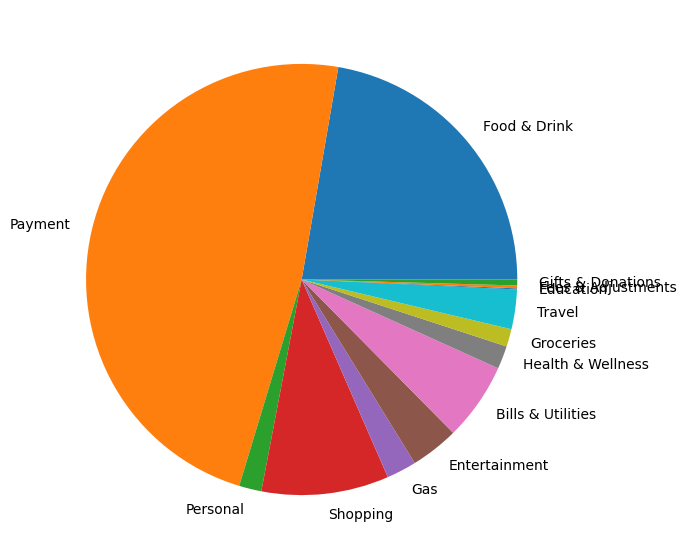

In [32]:
make_category_pie(cat_dict)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] [31.369999999999997, 180.57, 14.0, 129.95, 108.28999999999999, 128.35, 27.02] [29.071666666666673, 57.544999999999995, 76.34833333333333, 76.315, 179.52666666666664, 48.97, 48.068333333333335]


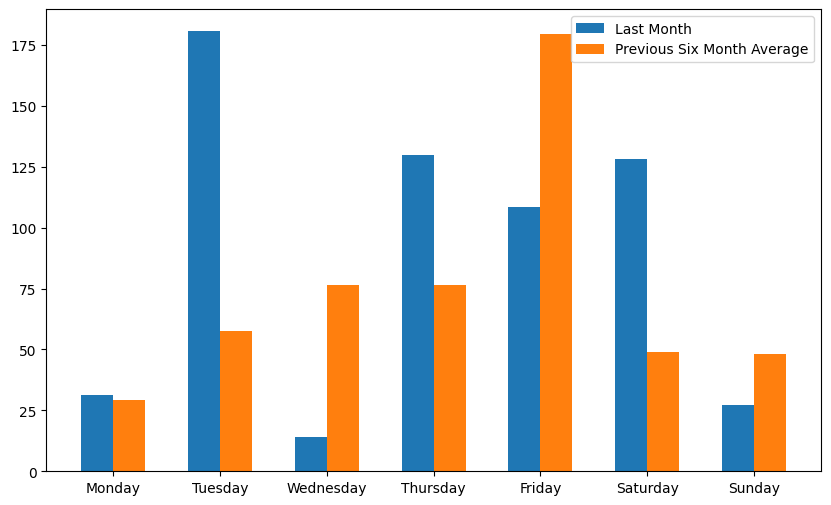

In [98]:
long_spending_by_day_dict = avg_spending_by_day_long_term(long_term_payment)
spending_by_day_dict = spending_by_day(payment_list)

def make_dow_bar(dow_dict,long_dow_dict):
    short_days = []
    long_days = []
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    for day in days:
        if day in long_dow_dict:
            long_days.append(long_dow_dict[day])
        else:
            long_days.append(0)
        if day in dow_dict:
            short_days.append(dow_dict[day])
        else:
            short_days.append(0)
    print(days,short_days,long_days)
    width = 0.3
    X = np.arange(len(days)) 
    plt.figure(figsize=(10,6))
    plt.bar(X, short_days, width = width,label = "Last Month")
    plt.bar(X+width,long_days, width = width,label = "Previous Six Month Average")
    plt.xticks(X+width/2,days)
    plt.legend()
    plt.show()
    
make_dow_bar(spending_by_day_dict,long_spending_by_day_dict)

['Personal', 'Food & Drink', 'Shopping', 'Entertainment', 'Gifts & Donations', 'Travel', 'Fees & Adjustments', 'Groceries', 'Bills & Utilities', 'Gas', 'Health & Wellness', 'Payment', 'Education'] [82.35, 164.79, 116.0, 125.45, 26.38, 32.0, 12.600000000000001, 0, 59.980000000000004, 0, 0, 565.48, 0] [16.683333333333334, 221.19000000000003, 94.71499999999999, 35.903333333333336, 4.3966666666666665, 29.46666666666667, 2.1, 13.101666666666667, 57.99666666666667, 22.291666666666668, 17.166666666666668, 477.05333333333334, 0.8333333333333334]


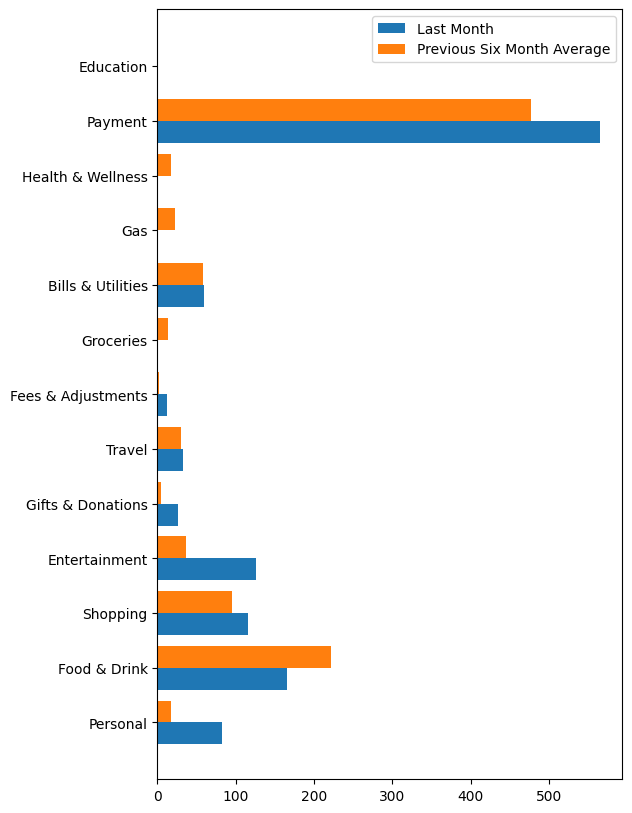

In [97]:
long_spending_by_cat_dict = avg_spending_by_category_long_term(long_term_payment)
spending_by_cat_dict = spending_by_category(payment_list)

def make_cat_bar(cat_dict,long_cat_dict):
    short_cat = []
    long_cat = []
    categories = list(set(cat_dict.keys()) | set(long_cat_dict.keys()))
    for category in categories:
        if category in long_cat_dict:
            long_cat.append(long_cat_dict[category])
        else:
            long_cat.append(0)
        if category in cat_dict:
            short_cat.append(cat_dict[category])
        else:
            short_cat.append(0)
    print(categories,short_cat,long_cat)
    width = 0.4
    X = np.arange(len(categories)) 
    plt.figure(figsize=(6,10))
    plt.barh(X, short_cat, width, label = "Last Month")
    plt.barh(X+width,long_cat,width,label = "Previous Six Month Average")
    plt.yticks(X+width/2,categories)
    plt.legend()
    plt.show()
    
make_cat_bar(spending_by_cat_dict,long_spending_by_cat_dict)

['NYACK HOT BAGELS', 'EAGLESDELI.COM', 'CVS/PHARMACY #01889', 'WALGREENS #13468', '75 CHESTNUT', 'JERSEY MIKES 16026', 'STAR MARKET 0645', 'Brighton Laundry &amp; Dry Cl', 'UCONN CONC', 'New Balance', 'THE CORNER DELI', 'FLAT BREADS', 'CVS/PHARMACY #01862', 'PRU CNTR LGND CONC CLVR', 'AM CANCER SOC CV', "BJ'S RESTAURANTS 559", 'CVS/PHARMACY #01030', 'TST* Max and Leos Artisa', 'STORRS WINE &amp; SPIRITS 1', 'AMERS DELI.', 'SCOREKEEPERS', 'NEWSLINK 13 BOS', 'TST* NO THAI- SOUTH U', 'TM *DROPKICK MURPHYS', 'INSOMNIA COOKIES-STORR', 'CVS/PHARMACY #00107', 'SUNOCO 0016867401', 'CASH ADVANCE INTEREST CHA', 'MIAMI TO GO', 'SQ *WAFFLE CABIN MT SNOW', 'TST* GANSETT WRAPS  STORR', 'BJS WHOLESALE #0205', 'BOSTON COLLEGE EMARKET', '742-SHOREPOINTSMARKET@', 'SHELL OIL 57542442009', '7-ELEVEN 32454', 'TRANSACTION FEE', 'THE CIRCLE TAVERN', 'DROPKICK MURPHYS', 'PANCAKES PLUS INC', 'CRAZY DOUGHS PIZZA', 'Payment Thank You-Mobile', 'CAICALI 2', 'MICHAELS STORES 1183', 'FLAT BREADS CAFE', 'PASCARELLA B

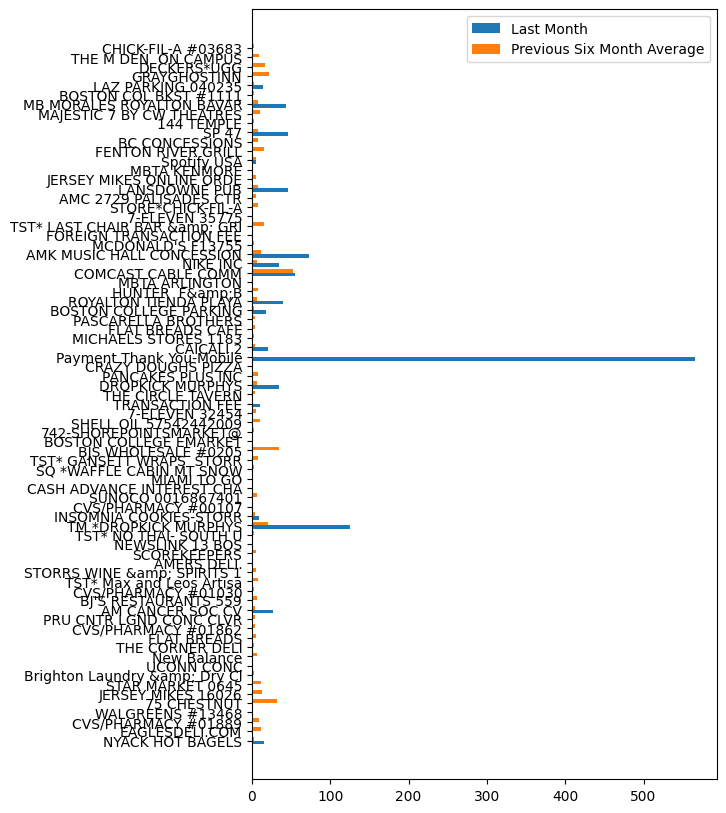

In [100]:
#Absolutely useless
long_spending_by_loc_dict = avg_spending_by_location_long_term(long_term_payment)
spending_by_loc_dict = spending_by_location(payment_list)

def make_loc_bar(cat_dict,long_cat_dict):
    short_cat = []
    long_cat = []
    categories = list(set(cat_dict.keys()) | set(long_cat_dict.keys()))
    for category in categories:
        if category in long_cat_dict:
            long_cat.append(long_cat_dict[category])
        else:
            long_cat.append(0)
        if category in cat_dict:
            short_cat.append(cat_dict[category])
        else:
            short_cat.append(0)
    print(categories,short_cat,long_cat)
    width = 0.4
    X = np.arange(len(categories)) 
    plt.figure(figsize=(6,10))
    plt.barh(X, short_cat, width, label = "Last Month")
    plt.barh(X+width,long_cat,width,label = "Previous Six Month Average")
    plt.yticks(X+width/2,categories)
    plt.legend()
    plt.show()
    
make_loc_bar(spending_by_loc_dict,long_spending_by_loc_dict)

dict_keys(['CASH ADVANCE INTEREST CHA', 'INSOMNIA COOKIES-STORR', 'LAZ PARKING 040235', 'AM CANCER SOC CV', 'LANSDOWNE PUB', 'Spotify USA', 'NIKE INC', 'BOSTON COLLEGE PARKING', 'AMK MUSIC HALL CONCESSION', 'DROPKICK MURPHYS', 'TM *DROPKICK MURPHYS', 'SP 47', 'NYACK HOT BAGELS', 'CAICALI 2', 'TRANSACTION FEE', 'FOREIGN TRANSACTION FEE', 'MB MORALES ROYALTON BAVAR', 'ROYALTON TIENDA PLAYA', 'COMCAST CABLE COMM'])


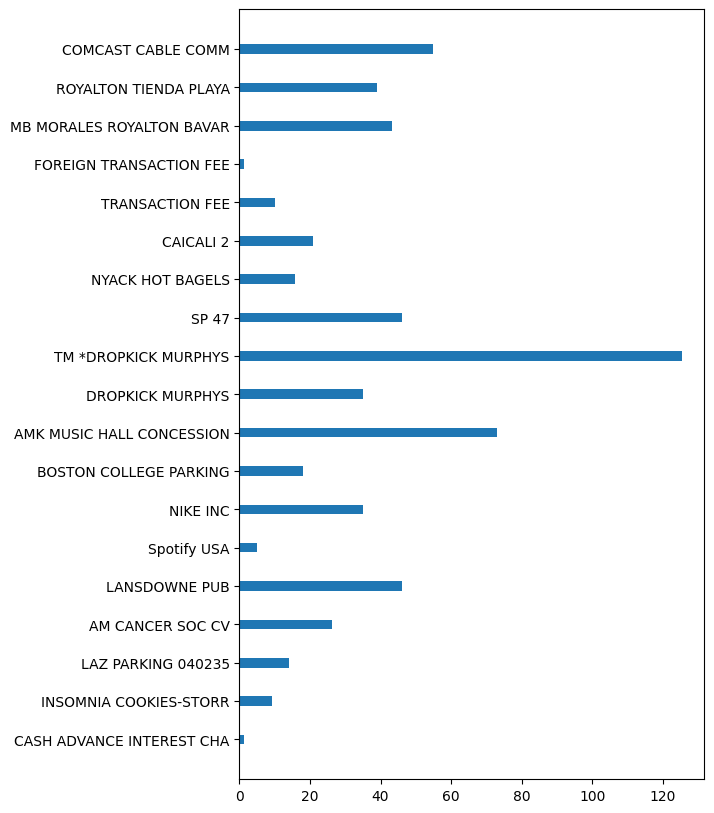

dict_keys(['FLAT BREADS', 'Brighton Laundry &amp; Dry Cl', 'JERSEY MIKES 16026', 'EAGLESDELI.COM', 'MICHAELS STORES 1183', 'SHELL OIL 57542442009', 'MAJESTIC 7 BY CW THEATRES', 'Spotify USA', '7-ELEVEN 35775', 'AMERS DELI.', 'THE M DEN  ON CAMPUS', 'TST* NO THAI- SOUTH U', 'SCOREKEEPERS', 'NEWSLINK 13 BOS', 'CRAZY DOUGHS PIZZA', 'COMCAST CABLE COMM', '7-ELEVEN 32454', 'BC CONCESSIONS', 'THE CORNER DELI', 'CVS/PHARMACY #01889', 'DECKERS*UGG', 'PASCARELLA BROTHERS', 'PRU CNTR LGND CONC CLVR', 'SUNOCO 0016867401', 'INSOMNIA COOKIES-STORR', 'UCONN CONC', 'GRAYGHOSTINN', 'MBTA KENMORE', 'SQ *WAFFLE CABIN MT SNOW', 'TST* LAST CHAIR BAR &amp; GRI', "MCDONALD'S F13755", "BJ'S RESTAURANTS 559", 'HUNTER  F&amp;B', 'CVS/PHARMACY #01030', 'CHICK-FIL-A #03683', 'JERSEY MIKES ONLINE ORDE', 'FENTON RIVER GRILL', 'TST* GANSETT WRAPS  STORR', 'New Balance', '144 TEMPLE', 'STORE*CHICK-FIL-A', 'LAZ PARKING 040235', 'BJS WHOLESALE #0205', 'PANCAKES PLUS INC', '742-SHOREPOINTSMARKET@', 'MIAMI TO GO', 'WALG

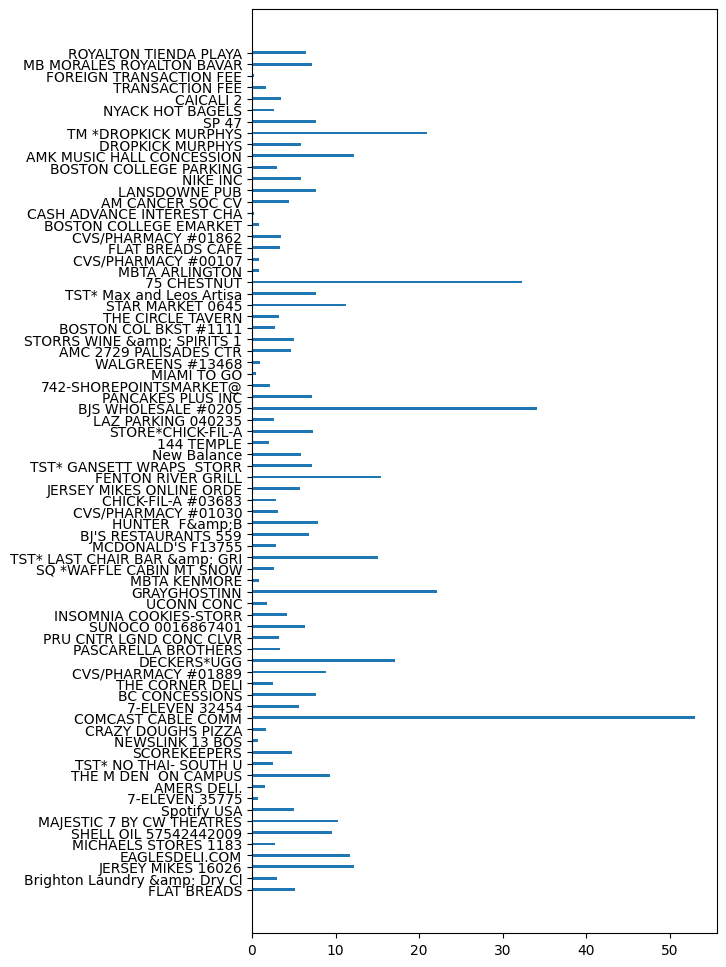

In [122]:
long_spending_by_loc_dict = avg_spending_by_location_long_term(long_term_payment)
spending_by_loc_dict = spending_by_location(payment_list)

def make_loc_bar_short(loc_dict):
    locations = loc_dict.keys()
    print(locations)
    width = 0.25
    X = np.arange(len(locations)) 
    plt.figure(figsize=(6,10))
    plt.barh(X, loc_dict.values(), width)
    plt.yticks(X,locations)
    plt.show()

def make_loc_bar_long(long_loc_dict):
    locations = long_loc_dict.keys()
    print(locations)
    width = 0.25
    X = np.arange(len(locations)) 
    plt.figure(figsize=(6,12))
    plt.barh(X, long_loc_dict.values(),width)
    plt.yticks(X,locations)
    plt.show()
    
make_loc_bar_short(spending_by_loc_dict)
make_loc_bar_long(long_spending_by_loc_dict)

In [ ]:
print("Please download your bank statements in .csv form and place them in the same directory (folder) as this software")
file_name = input("Please input the name of your bank statement")

Please download your bank statements in .csv form and place them in the same directory (folder) as this software
